# Explore the assumption of star-formation history and DCO compute rates at one single metallicity 📖

If you haven't done so yet, export the path POSYDON environment variables.

In [1]:
%env PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
%env PATH_TO_POSYDON_DATA=/Volumes/T7/

env: PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
env: PATH_TO_POSYDON_DATA=/Volumes/T7/


We will use the same BBH population as in the `Analyzing Merging BBH Populations: Rates & Observations` tutorial. Instead of computing the distributions and rates at all metallicities, we will just focus on one metallicity, $Z_\odot$, and integrate the star formation history around solar metallicity, say $[0.5Z_\odot,2Z_\odot]$. Let's extract the merging BBH population from the $Z_\odot$ population synthesis model. In this sample there are only ~200 systems, to increase the statistics we suggest you run a population containing x50 more binaries.

In [2]:
import os
from posydon.popsyn.synthetic_population import SyntheticPopulation
from config import PATH_TO_POSYDON_DATA

path = os.path.join(PATH_TO_POSYDON_DATA, "POSYDON_data/tutorials/population-synthesis/example/")
files = [f for f in os.listdir(path) if '1.00e+00_Zsun_population' in f]
path_to_data = [os.path.join(path, file) for file in files] 

pop = SyntheticPopulation(path_to_ini='./population_params.ini', path_to_data=path_to_data, verbose=True)

pop.parse(S1_state='BH', S2_state='BH', binary_state='contact', invert_S1S2=False)
pop.save_pop(os.path.join(path,'BBH_population_1e+00_Zsun.h5'))

pop.df.head(10)
del pop

Binary count with (S1_state, S2_state, binary_state, binary_event) equal
to (BH, BH, contact, None)
in /Volumes/T7/POSYDON_data/tutorials/population-synthesis/example/1.00e+00_Zsun_population.h5 are 233
Total binaries found are 233
Population successfully saved!


/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:300: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['state', 'event', 'step_names', 'S1_state', 'S2_state'], dtype='object')]

  self.df.to_hdf(path, key='history')
/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:301: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['state_i', 'event_i', 'step_names_i', 'state_f', 'event_f',
       'step_names_f', 'S1_state_i', 'S1_state_f', 'S1_SN_type', 'S2_state_i',
       'S2_state_f', 'S2_SN_type', 'interp_class_HMS_HMS',
       'interp_class_CO_HMS_RLO', 'interp_class_CO_HeMS',
       'interp_class_CO_HeMS_RLO', 'mt_history_HMS_HMS',
       'mt_history_CO_HM

POSYDON supports different assumptions for the star formation history, e.g. instead of using the IllustrisTNG SFH, we can use the star formation rate from Madau & Fragos (2018) (see Andrews et al. in prep.) and assume a log-normal metallicity distribution around the empirically measured mean metallicity at each redshift from Madau & Fragos (2018), taking a dispersion of 0.5 dex (see Bavera et al. 2020). The IllustrisTNG star formation rate and metallicity evolution (solid line) is compared to the Madau & Fragos (2018) metallicity evolution (dashed line) in Fig. X of (see Andrews et al. in prep.), which figure is reproduced below. The dotted line corresponds to the metallicity distribution of Neijssel et al. (2019).

![Star Fromation Rate](./pictures/SFR.png "Star Formation Rate")

![Metallicity Distribution](./pictures/met_dist.png "Metallicity Distribution")

In [3]:
import os
import numpy as np
from config import PATH_TO_POSYDON_DATA
from posydon.popsyn.synthetic_population import SyntheticPopulation

# cosmological model parameters for the rate calculation
MODEL = {
    'delta_t' : 100, # Myr
    'SFR' : 'Madau+Fragos17',
    'sigma_SFR' : 'Bavera+20',
    'Z_max' : 1.,
    'Zsun' : 0.0142,
    'select_one_met' : True,
    'dlogZ' : [np.log10(0.0142/2),np.log10(0.0142*2)],
}

pop = SyntheticPopulation('./population_params.ini', verbose=True, MODEL=MODEL)
path = os.path.join(PATH_TO_POSYDON_DATA, "POSYDON_data/tutorials/population-synthesis/example/")
pop.load_pop(os.path.join(path,'BBH_population_1e+00_Zsun.h5'))

# generate the BBH synthetic population
pop.get_dco_at_formation(S1_state='BH', S2_state='BH', 
                         oneline_cols=['S1_natal_kick_array_0', 'S2_natal_kick_array_0'],
                         formation_channels=True)

# we can save the synthetic population
# pop.save_synthetic_pop(os.path.join(path,'BBH_synthetic_population.h5'))
# pop.load_synthetic_pop(os.path.join(path,'BBH_synthetic_population.h5'))

cols = ['metallicity','time','t_delay','S1_state','S2_state','S1_mass','S2_mass',
        'S1_spin','S2_spin', 'orbital_period','eccentricity', 'channel']
pop.df_synthetic[cols]

Population successfully loaded!
Computing formation channels...


/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:804: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ZAMS_oDoubleCE1_CC1_redirect_CC2_CO_contact_END' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.df_oneline.loc[index,'channel_debug'] = formation_channel
/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:808: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ZAMS_oDoubleCE1_CC1_CC2_END' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.df_oneline.loc[index,'channel'] = formation_channel


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,orbital_period,eccentricity,channel
0,0.0142,4.027170,2913.863804,BH,BH,13.120462,12.911080,0.079649,0.064849,1.611464,0.048133,ZAMS_oDoubleCE1_CC1_CC2_END
1,0.0142,4.027170,1500.583774,BH,BH,13.120462,12.911080,0.079649,0.063991,1.279098,0.123592,ZAMS_oDoubleCE1_CC1_CC2_END
2,0.0142,4.849573,662.821800,BH,BH,10.330899,9.888130,0.286911,0.249267,0.817643,0.165775,ZAMS_oDoubleCE1_CC1_CC2_END
3,0.0142,4.544886,845.424610,BH,BH,11.355246,10.251920,0.320931,0.298164,1.108194,0.379450,ZAMS_oDoubleCE1_CC1_CC2_END
4,0.0142,4.530889,620.499837,BH,BH,11.436823,10.900538,0.190982,0.167996,0.830194,0.107165,ZAMS_oDoubleCE1_CC1_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.0142,7.928745,426.765027,BH,BH,17.564588,8.155695,0.040933,0.015301,17.694336,0.957889,ZAMS_oRLO1_CC1_oRLO2_CC2_END
229,0.0142,4.530889,787.032676,BH,BH,11.436823,10.900538,0.190982,0.168671,0.894027,0.022964,ZAMS_oDoubleCE1_CC1_CC2_END
230,0.0142,4.848528,943.501358,BH,BH,10.331316,9.972710,0.312185,0.277781,0.911809,0.093335,ZAMS_oDoubleCE1_CC1_CC2_END
231,0.0142,4.256912,1266.769326,BH,BH,12.239574,11.551092,0.179405,0.165071,1.159215,0.175475,ZAMS_oDoubleCE1_CC1_CC2_END


Similar to the `Analyzing Merging BBH Populations: Rates & Observations` we compute the BBH merger rate density to obtain the BBH intrinsic population.

In [4]:
pop.get_dco_merger_rate_density()
# pop.save_intrinsic_pop(os.path.join(path,'BBH_intrinsic_population.h5'))
# pop.load_intrinsic_pop(os.path.join(path,'BBH_intrinsic_population.h5'))
pop.df_dco_intrinsic[cols]

100%|██████████| 7/7 [00:09<00:00,  1.30s/it]

DCO merger rate density in the local Universe (z=0.00): 10.74 Gpc^-3 yr^-1


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,orbital_period,eccentricity,channel
0,0.0142,6.205715,4.287125e-08,BH,BH,12.260188,12.183039,0.050168,8.244612e-04,326.580311,0.999994,ZAMS_CC1_oRLO2_CC2_END
1,0.0142,4.705799,9.754266e-01,BH,BH,12.850735,20.143346,0.027546,5.791334e-17,2377.230212,0.999817,ZAMS_CC1_CC2_END
2,0.0142,8.187239,2.075700e+00,BH,BH,8.314851,8.315119,0.100591,6.554160e-03,38.651550,0.996045,ZAMS_oRLO1-reverse_CC1_CC2_END
3,0.0142,6.647572,2.472628e+01,BH,BH,9.826765,9.853595,0.032525,2.400078e-02,14.240625,0.980550,ZAMS_oRLO1-contact_CC1_CC2_END
4,0.0142,6.676527,1.680554e+01,BH,BH,20.974131,12.500642,0.000531,4.772162e-04,696.487802,0.998932,ZAMS_CC1_oRLO2_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...
26870,0.0142,7.928745,4.267650e+02,BH,BH,17.564588,8.155695,0.040933,1.530132e-02,17.694336,0.957889,ZAMS_oRLO1_CC1_oRLO2_CC2_END
26871,0.0142,4.530889,7.870327e+02,BH,BH,11.436823,10.900538,0.190982,1.686708e-01,0.894027,0.022964,ZAMS_oDoubleCE1_CC1_CC2_END
26872,0.0142,4.848528,9.435014e+02,BH,BH,10.331316,9.972710,0.312185,2.777810e-01,0.911809,0.093335,ZAMS_oDoubleCE1_CC1_CC2_END
26873,0.0142,4.256912,1.266769e+03,BH,BH,12.239574,11.551092,0.179405,1.650709e-01,1.159215,0.175475,ZAMS_oDoubleCE1_CC1_CC2_END


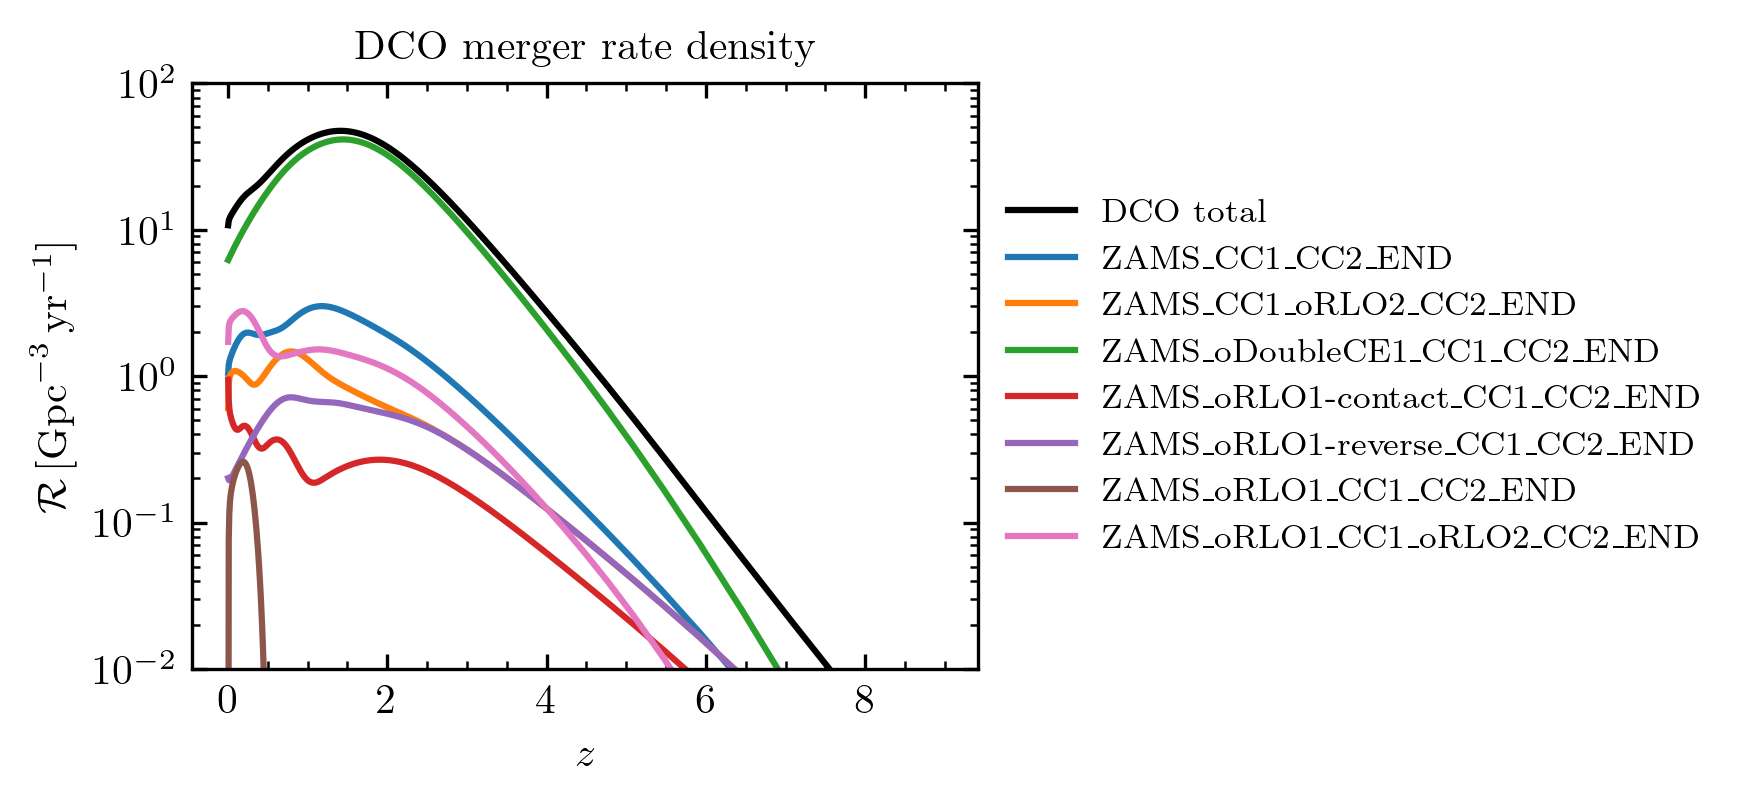

In [6]:
pop.plot_rate_density(DCO=True, channels=True, **{'ylim' : [0.01, 100]})

In [8]:
pop.get_dco_detection_rate(sensitivity='design_H1L1V1') # if already computed use load_data=True
# pop.save_observable_pop(os.path.join(path,'BBH_observable_population.h5'))
# pop.load_observable_pop(os.path.join(path,'BBH_observable_population.h5'))
pop.df_dco_observable[cols]

100%|██████████| 138/138 [00:13<00:00, 10.45it/s]

DCO detection rate at design_H1L1V1 sensitivity: 590.18 yr^-1


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,orbital_period,eccentricity,channel
0,0.0142,6.205715,4.287125e-08,BH,BH,12.260188,12.183039,0.050168,8.244612e-04,326.580311,0.999994,ZAMS_CC1_oRLO2_CC2_END
1,0.0142,4.705799,9.754266e-01,BH,BH,12.850735,20.143346,0.027546,5.791334e-17,2377.230212,0.999817,ZAMS_CC1_CC2_END
2,0.0142,8.187239,2.075700e+00,BH,BH,8.314851,8.315119,0.100591,6.554160e-03,38.651550,0.996045,ZAMS_oRLO1-reverse_CC1_CC2_END
3,0.0142,6.647572,2.472628e+01,BH,BH,9.826765,9.853595,0.032525,2.400078e-02,14.240625,0.980550,ZAMS_oRLO1-contact_CC1_CC2_END
4,0.0142,6.676527,1.680554e+01,BH,BH,20.974131,12.500642,0.000531,4.772162e-04,696.487802,0.998932,ZAMS_CC1_oRLO2_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...
19536,0.0142,7.214096,1.052488e+04,BH,BH,12.340761,8.201690,0.185531,1.411149e-01,2.783007,0.396922,ZAMS_CC1_oRLO2_CC2_END
19537,0.0142,3.443633,6.236191e+03,BH,BH,12.585380,12.508058,0.090103,2.004811e-03,250.806290,0.988294,ZAMS_CC1_CC2_END
19538,0.0142,4.900714,4.178555e+03,BH,BH,17.470438,16.106886,0.202329,4.508136e-04,1580.389855,0.997143,ZAMS_oRLO1-reverse_CC1_CC2_END
19539,0.0142,7.154675,8.766378e+03,BH,BH,10.272165,9.248458,0.090886,1.197166e-01,3.129920,0.527011,ZAMS_oRLO1_CC1_oRLO2_CC2_END


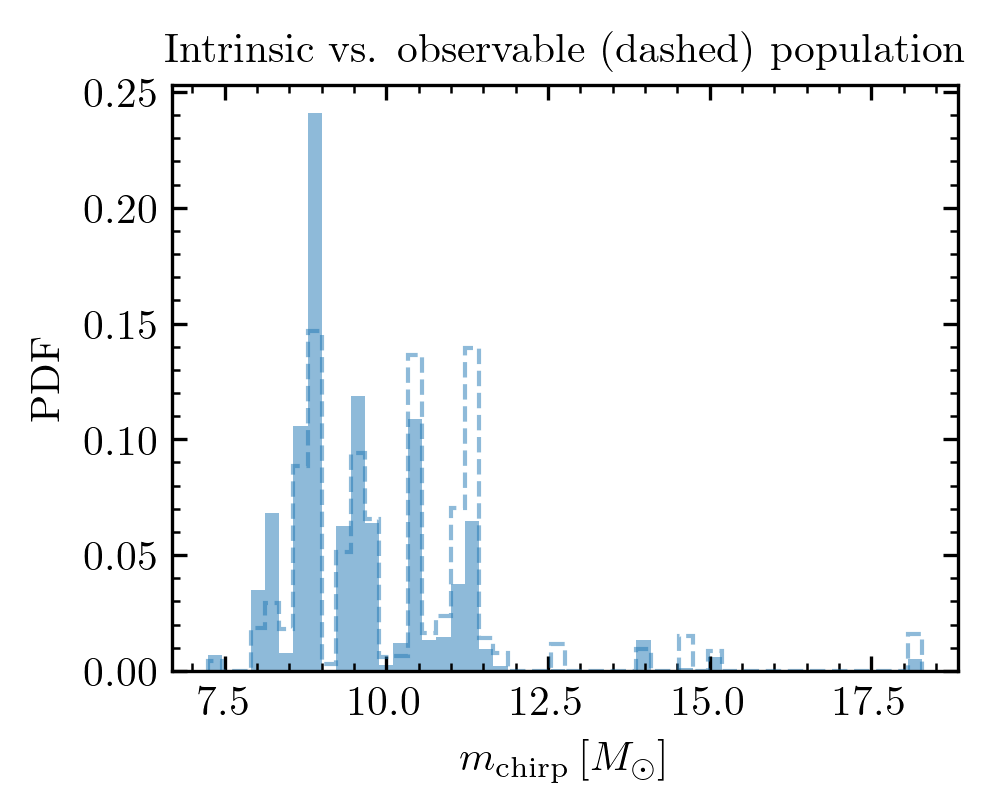

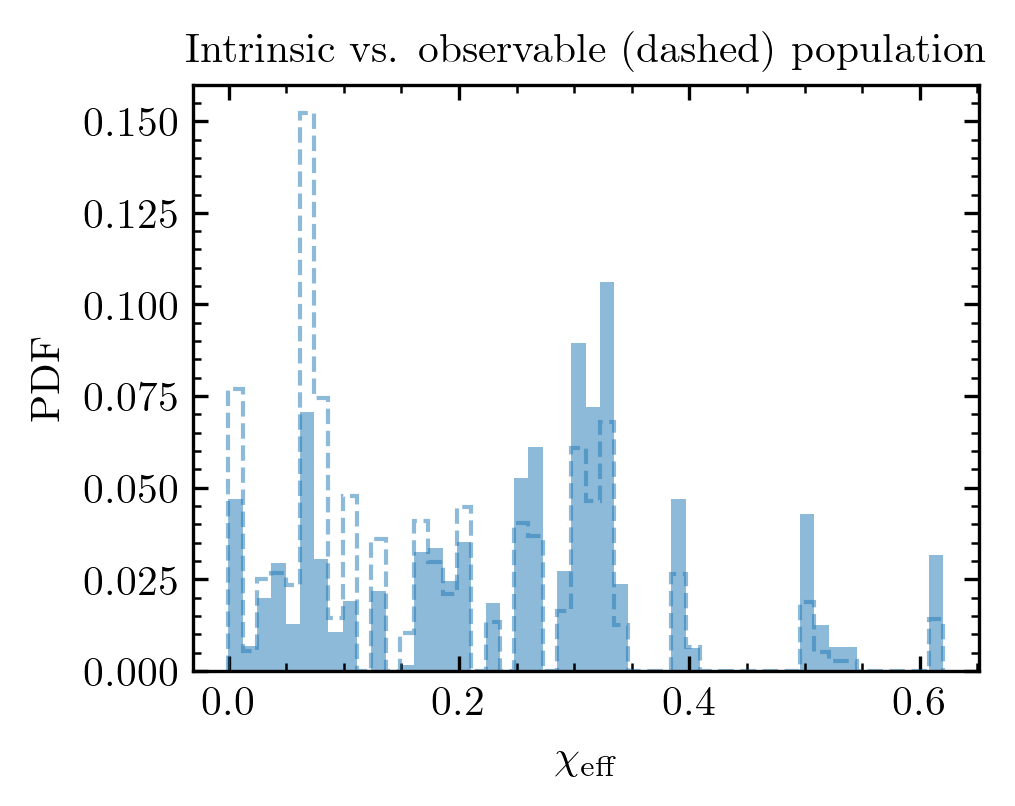

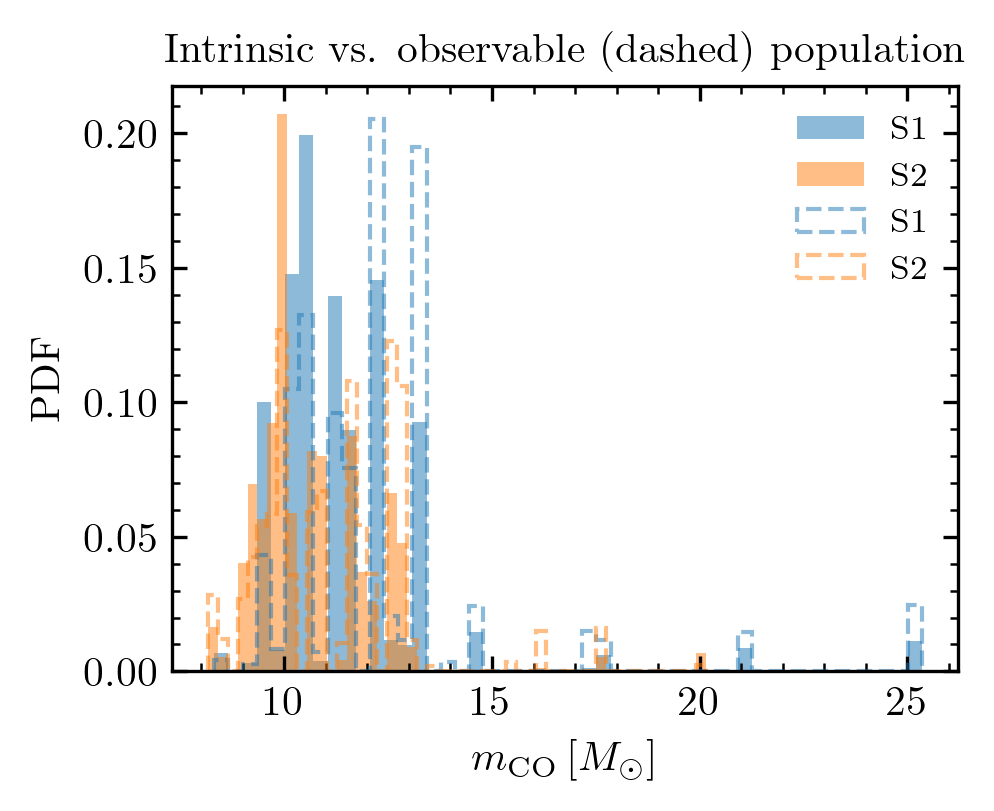

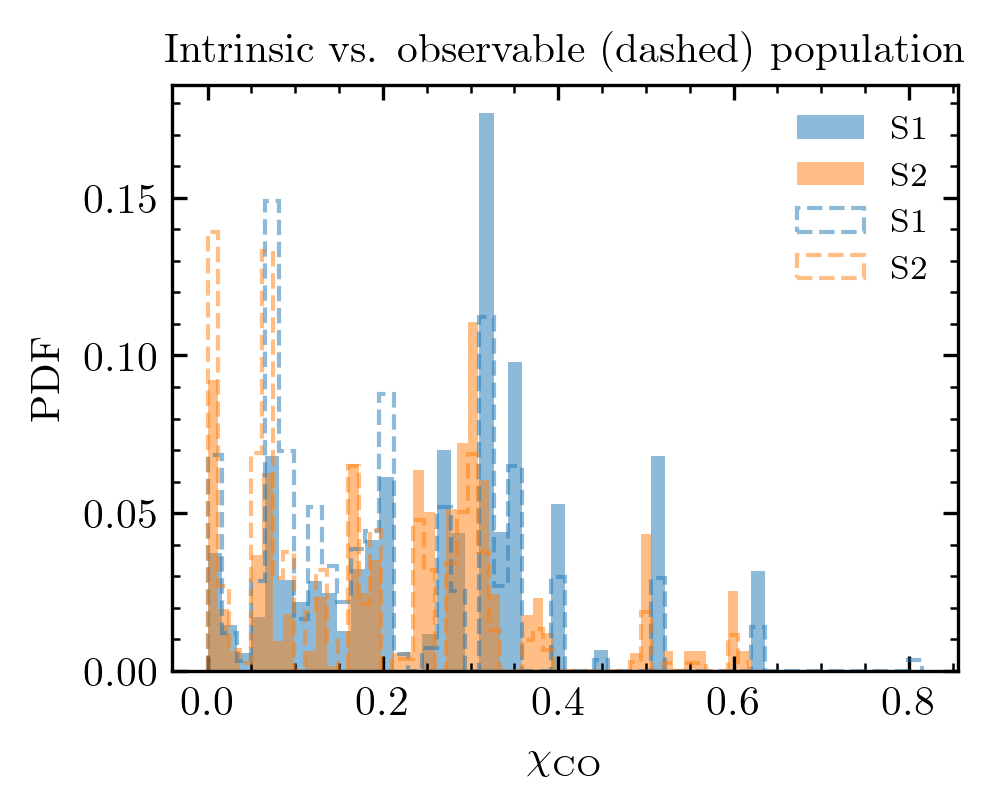

In [9]:
kwargs = dict(bins=50, xlog=False)
pop.plot_hist_properties('m_chirp', intrinsic=True, observable=True, pop='DCO', **kwargs)
pop.plot_hist_properties('chi_eff', intrinsic=True, observable=True, pop='DCO', **kwargs)
pop.plot_hist_properties(['S1_mass','S2_mass'], intrinsic=True, observable=True, pop='DCO', **kwargs)
pop.plot_hist_properties(['S1_spin','S2_spin'], intrinsic=True, observable=True, pop='DCO', **kwargs)